# Adding employee salary to April 2018 summary data set

### Reads in the extra data set from an excel file (renamed to /datasets/ActivatedInsights/ExtraDataForAkira.xlsx)¶

- Chose the correct location code and make a dataframe that contains median salary for each location.
- Perform the appropriate transformation (for skewed data)
- Normalize and standardize the data

### Save salary data (as .pkl file)

- Save the employee median salary for each location.


In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 

### Read the excel file that shows annual salary for individual employees

In [2]:
#Read the new excel file, this contains the annual pay for indiviual employees
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ExtraDataForAkira.xlsx'
data1 = pd.read_excel(current_path + file)

In [3]:
#Confirm data
data1.head()

,OLD # May 2018 Location Code,New # May 2019 Location Code,Department- Updated,LGBT,Managerial Level- Updated,Meaningful Innovation Opportunities,Pay Type,Responsibility,Role,Tenure,Work Status,Annual pay,zip(home),Job Title,Action/Reason Description,Voluntary/Involuntary
0,1075.0,1075.0,Admin,Yes,Employee-IC,A lot,Hourly,Neither children nor elders,RECRUITING PROGRAM COORDINATOR,6 months to 9 months,Full-time,52000.0,32806,RECRUITING PROGRAM COORDINATOR,NaN,NaN
1,5504.0,5954.0,Activities,No,Employee-IC,A lot,Hourly,Both children and elders,ENRICHMENT COORDINATOR,9 months to 1 year,Full-time,33280.0,80212,ENRICHMENT COORDINATOR,Resignation,Voluntary
2,5504.0,5954.0,Housekeeping-Maint-Sec,No,Frontline manager,A lot,Hourly,Both children and elders,HEAD HOUSEKEEPER,Over 20 years,Full-time,34632.0,80226,HEAD HOUSEKEEPER,NaN,NaN
3,5504.0,5954.0,Admin,No,Frontline manager,A lot,Hourly,Elders,ASSISTANT GENERAL MANAGER,1 year to 2 years,Full-time,45177.6,80107,ASSISTANT GENERAL MANAGER,Resignation,Voluntary
4,5504.0,5954.0,Housekeeping-Maint-Sec,No,Employee-IC,A lot,Hourly,Both children and elders,HOUSEKEEPING (CLEANING),1 year to 2 years,Full-time,29120.0,80219,HOUSEKEEPING (CLEANING),NaN,NaN


In [4]:
#Rename columns to remove the space and make it shorter.
data1.rename(columns = {'OLD # May 2018 Location Code':'LocationCode2018'}, inplace = True) 
data1.rename(columns = {'New # May 2019 Location Code':'LocationCode2019'}, inplace = True) 
data1.rename(columns = {'Annual pay':'AnnualPay'}, inplace = True) 

### Load the 2018 May data to get the location code for the dataset. 

In [5]:
#Load the 2018 May dataset.
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file2 = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data2 = pd.read_excel(current_path + file2)

#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data2.iloc[2:-13]
#LocationCode will contain the column for the location code for this study use the May 2019 code
LocationCode_for_data = data2.iloc[:,2]

### Go through each location and calculate the median salary for each location

In [6]:
#get median pay for each location. Go through the location code and get the data
#Ignore NaN (default)

location_pay = np.zeros((LocationCode_for_data.shape[0],1))

#Get the data for each location, calculate the median pay for that location
for index in range(LocationCode_for_data.shape[0]):
    location_data=data1.loc[data1['LocationCode2019'] == LocationCode_for_data.iloc[index],'AnnualPay']
    #calculate the media for that location
    location_pay[index] = location_data.median()
location_pay = pd.DataFrame(data=location_pay)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd386fa940>]],
      dtype=object)

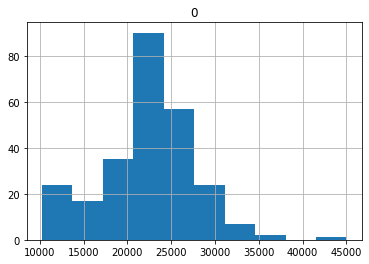

In [7]:
#Show the distribution of the median salary for each location
location_pay.hist()

### Standardize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd38a4ba58>]],
      dtype=object)

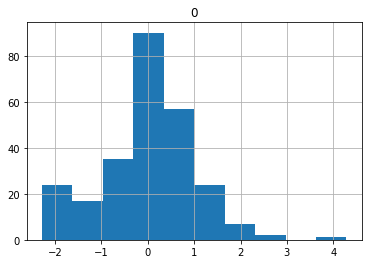

In [8]:
#Scale and standardize
scaler_location_pay = pp.StandardScaler().fit(location_pay)
location_payS = scaler_location_pay.transform(location_pay)
location_payS_df=pd.DataFrame(data=location_payS)
location_payS_df.hist()

### Save the data as a .pkl file

In [9]:
location_payS_df.to_pickle("./location_pay.pkl")